In [ ]:
#Importing Pandas & NumPy library
import pandas as pd
import numpy as np

# Loading the dataset ‘SpotifyFeatures.csv’ and reading it into a Pandas DataFrame (incorporating the file path)
df = pd.read_csv('/content/SpotifyFeatures.csv')

# Displaying basic information about the dataset such as columns, non-null counts, and datatypes
print(df.info())

# Extracting the statistical summary of the numerical columns
print(df.describe())

# Checking the first 10 rows of the dataset
print(df.head(10))

# Checking the last 10 rows of the dataset
print(df.tail(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [ ]:
# Checking for all the missing values - In this dataset, we have one missing value in ‘track_name’ which is irrelevant as later we are going to remove the column
print(df.isnull().sum())

# Dropping irrelevant columns (‘artist_name’, 'track_id', 'track_name')
df_relevant = df.drop(columns=['artist_name', 'track_id', 'track_name'])

# Checking for duplicates and removing them
df_final = df_relevant.drop_duplicates()

# Checking if any duplicates were removed
print(f"df_relevant: {df_relevant.shape[0]} rows")
print(f"df_final: {df_final.shape[0]} rows")

# Displaying the processed and cleaned data ready for our prediction tasks
print(df_final.info())

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64
df_relevant: 232725 rows
df_final: 232641 rows
<class 'pandas.core.frame.DataFrame'>
Index: 232641 entries, 0 to 232724
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232641 non-null  object 
 1   popularity        232641 non-null  int64  
 2   acousticness      232641 non-null  float64
 3   danceability      232641 non-null  float64
 4   duration_ms       232641 non-null  int64  
 5   energy            232641 non-null  float64
 6   instrumentalness  232641 non-null  float64
 7   k

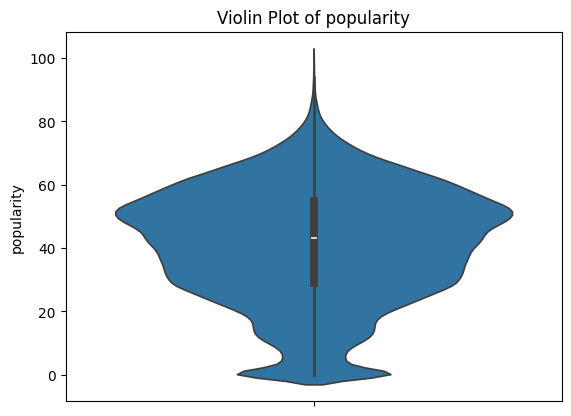

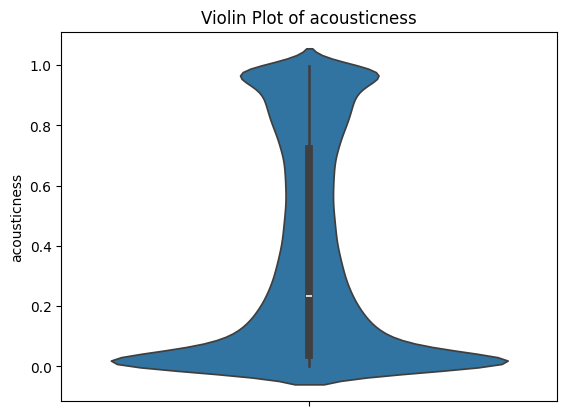

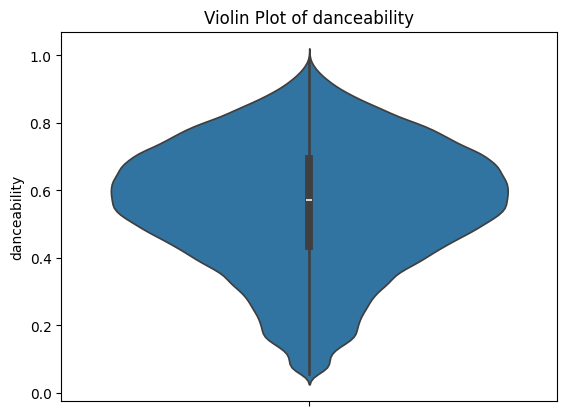

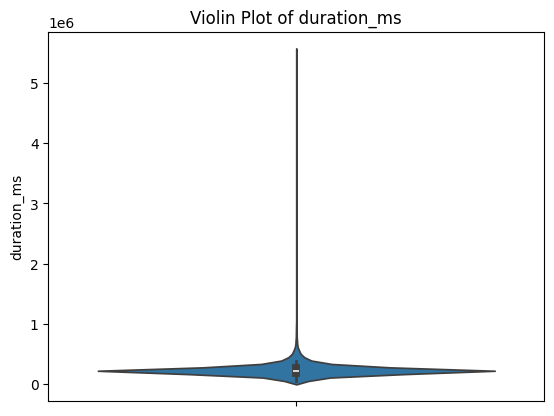

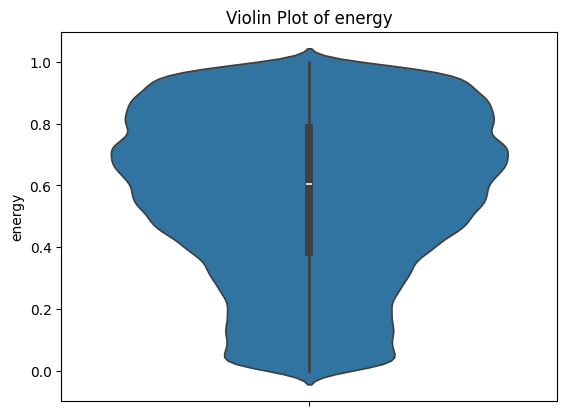

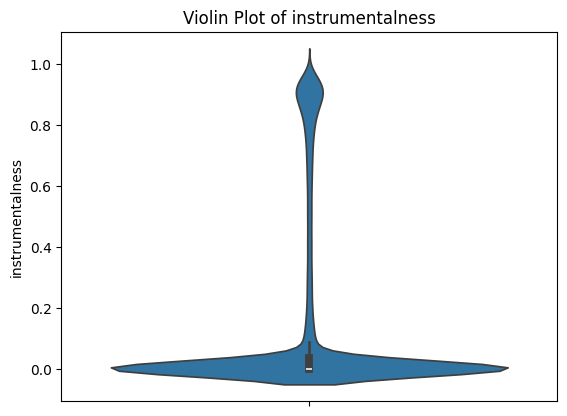

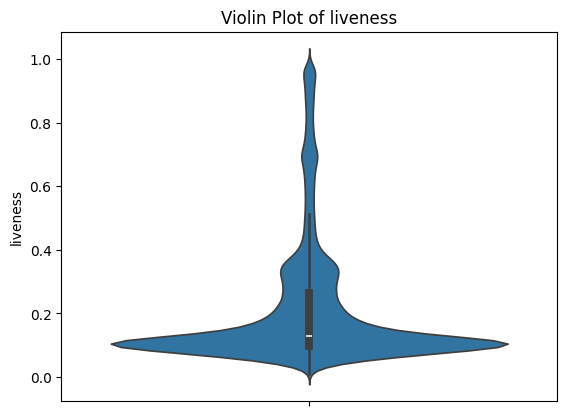

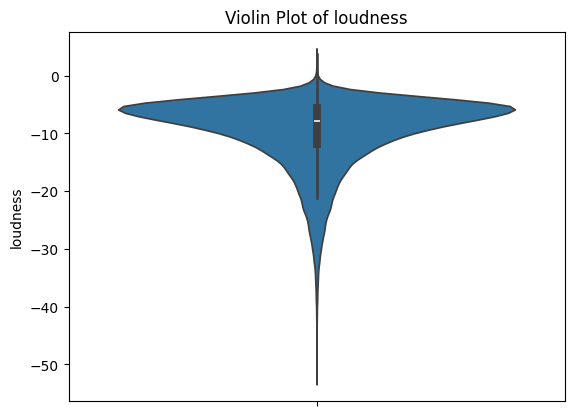

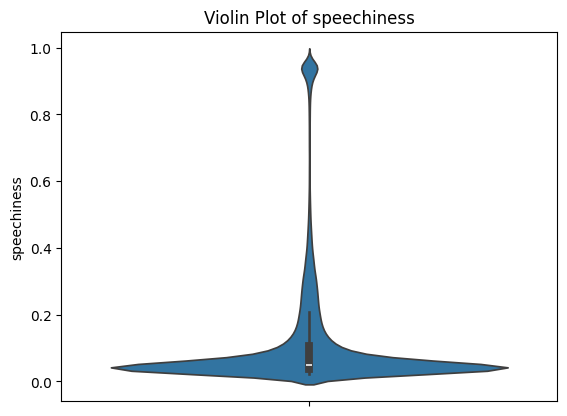

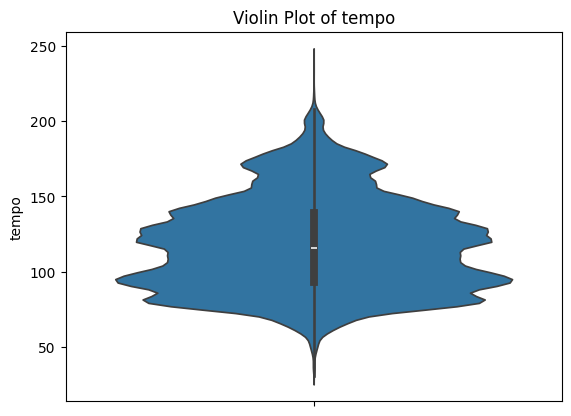

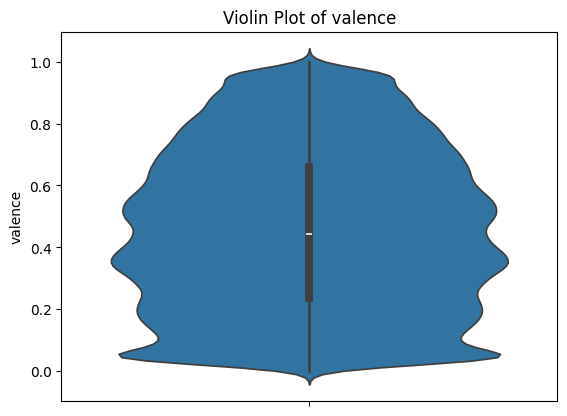

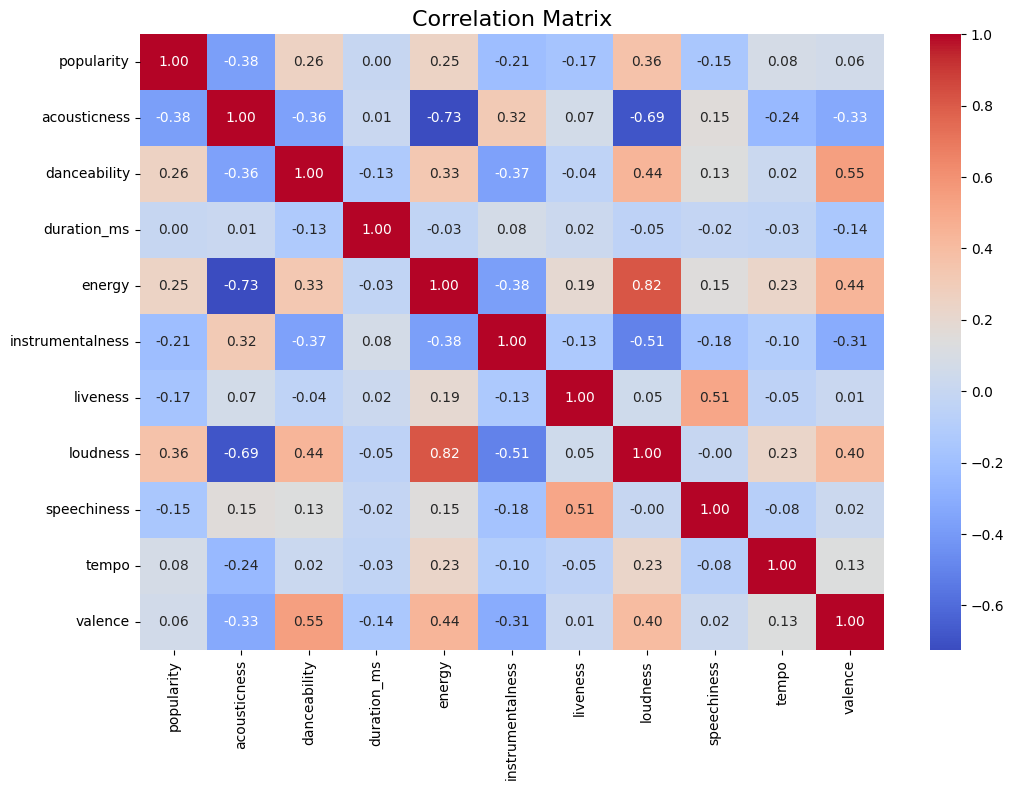

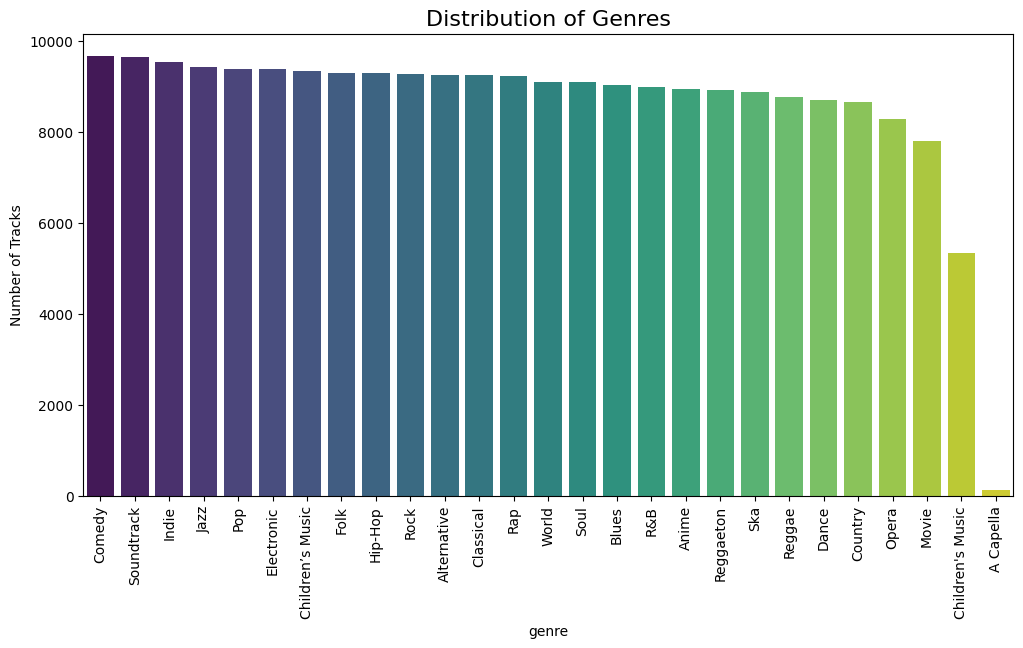

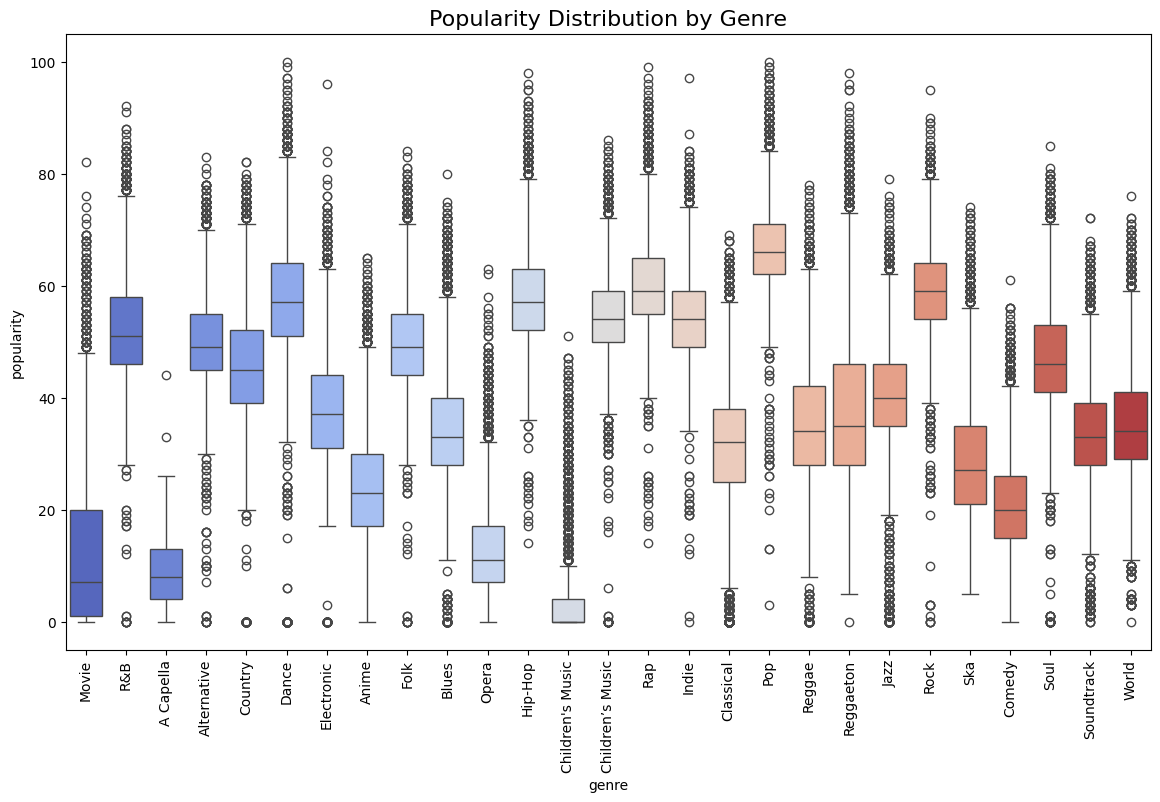

In [ ]:
#Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Getting numerical features to be used for the visualization
numerical_features_df = df_final.select_dtypes(include=['number']).columns

# Violin plots for the numerical features
for feature in numerical_features_df:
    sns.violinplot(y=df_final[feature])  # Creating violin plot for each feature
    plt.title(f"Violin Plot of {feature}")
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_final[numerical_features_df].corr(), annot=True, cmap='coolwarm', fmt='.2f') #Calculating the correlation matrix from the data frame (df_final) containing numerical data
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# Distribution of Genres
plt.figure(figsize=(12, 6))
genre_counts = df_final['genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, hue=genre_counts.index, palette='viridis', legend=False)
plt.title('Distribution of Genres', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Number of Tracks')
plt.show()

# Popularity by Genre
plt.figure(figsize=(14, 8))
sns.boxplot(x='genre', y='popularity', data=df_final, hue='genre', palette='coolwarm', legend=False)
plt.title('Popularity Distribution by Genre', fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Checking for all the categorical columns
categorical_cols = df_final.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

# Checking for all the numerical columns
numerical_cols = df_final.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

# One-hot encoding of the categorical columns
df_encoded = pd.get_dummies(df_final, columns=['genre', 'key', 'mode', 'time_signature'], drop_first=True)

# Standardizing the numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Displaying the transformed dataset
print(df_encoded.head())

Index(['genre', 'key', 'mode', 'time_signature'], dtype='object')
Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')
   popularity  acousticness  danceability  duration_ms    energy  \
0   -2.263156      0.683468     -0.890726    -1.141490  1.286745   
1   -2.208146     -0.345390      0.192184    -0.822006  0.630109   
2   -2.098125      1.644675      0.585479    -0.545450 -1.670012   
3   -2.263156      0.942796     -1.693479    -0.695440 -0.929874   
4   -2.043115      1.639038     -1.203207    -1.282299 -1.313228   

   instrumentalness  liveness  loudness  speechiness     tempo  ...  key_E  \
0         -0.489669  0.660547  1.290531    -0.367987  1.595752  ...  False   
1         -0.489669 -0.322883  0.668553    -0.183117  1.823407  ...  False   
2         -0.489669 -0.564958 -0.718435    -0.455841 -0.588264  ...  False   
3         -0.489669

In [ ]:
# Necessary Importing
from sklearn.model_selection import train_test_split

# Splitting for regression (target: popularity)
X_reg = df_encoded.drop(columns=['popularity'])
y_reg = df_encoded['popularity']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=123)

# Splitting for classification (example: target: genre_Rock)
X_clf = df_encoded.drop(columns=['genre_Rock'])  # Use the genre columns for classification
y_clf = df_encoded['genre_Rock']
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=123)

In [ ]:
# Import necessary libraries for regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error, r2_score

# Decision Tree Model with GridSearchCV for hyperparameter tuning
dt = DecisionTreeRegressor(random_state=123)
param_grid_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_dt.fit(X_train_reg, y_train_reg)
y_pred_dt = grid_dt.predict(X_test_reg)
print("Decision Tree - Best Params:", grid_dt.best_params_)
print("Decision Tree - RMSE:", root_mean_squared_error(y_test_reg, y_pred_dt))
print("Decision Tree - R² Score:", r2_score(y_test_reg, y_pred_dt))

# Random Forest model
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=123, bootstrap=True)
rf.fit(X_train_reg, y_train_reg)
y_pred_rf = rf.predict(X_test_reg)
print("Random Forest - RMSE:", root_mean_squared_error(y_test_reg, y_pred_rf))
print("Random Forest - R² Score:", r2_score(y_test_reg, y_pred_rf))

# Gradient Boosting Model
gbr = GradientBoostingRegressor(random_state=123)
gbr.fit(X_train_reg, y_train_reg)
y_pred_gbr = gbr.predict(X_test_reg)
print("Gradient Boosting Regression RMSE:", root_mean_squared_error(y_test_reg, y_pred_gbr))
print("Gradient Boosting Regression R² score:", r2_score(y_test_reg, y_pred_gbr))


Decision Tree - Best Params: {'max_depth': 20, 'min_samples_split': 20}
Decision Tree - RMSE: 0.5683036936880539
Decision Tree - R² Score: 0.6790771929902515
Random Forest - RMSE: 0.5151164848925127
Random Forest - R² Score: 0.7363361910546113
Gradient Boosting Regression RMSE: 0.546578453402162
Gradient Boosting Regression R² score: 0.7031448145640482


In [ ]:
# Import necessary libraries for classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression Model
log_reg = LogisticRegression(random_state=123, max_iter=500)
log_reg.fit(X_train_clf, y_train_clf)
y_pred_log_reg = log_reg.predict(X_test_clf)
print("Logistic Regression - Accuracy:", accuracy_score(y_test_clf, y_pred_log_reg))
print(classification_report(y_test_clf, y_pred_log_reg))

# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)  # Using default 5 neighbors
knn.fit(X_train_clf, y_train_clf)
y_pred_knn = knn.predict(X_test_clf)
print("KNN - Accuracy:", accuracy_score(y_test_clf, y_pred_knn))
print(classification_report(y_test_clf, y_pred_knn))

# SVM Model
svm = SVC(kernel='linear')  # Using linear kernel
svm.fit(X_train_clf, y_train_clf)
y_pred_svm = svm.predict(X_test_clf)
print("SVM - Accuracy:", accuracy_score(y_test_clf, y_pred_svm))
print(classification_report(y_test_clf, y_pred_svm))

Logistic Regression - Accuracy: 0.9999355240817555
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     44658
        True       1.00      1.00      1.00      1871

    accuracy                           1.00     46529
   macro avg       1.00      1.00      1.00     46529
weighted avg       1.00      1.00      1.00     46529

KNN - Accuracy: 0.980377828880913
              precision    recall  f1-score   support

       False       0.99      0.99      0.99     44658
        True       0.79      0.69      0.74      1871

    accuracy                           0.98     46529
   macro avg       0.89      0.84      0.86     46529
weighted avg       0.98      0.98      0.98     46529

SVM - Accuracy: 0.9999355240817555
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     44658
        True       1.00      1.00      1.00      1871

    accuracy                           1.00     46529
   macro